Initial shortest distance: 8.460910002382516e-05
Final shortest distance: 0.00011540996480449279


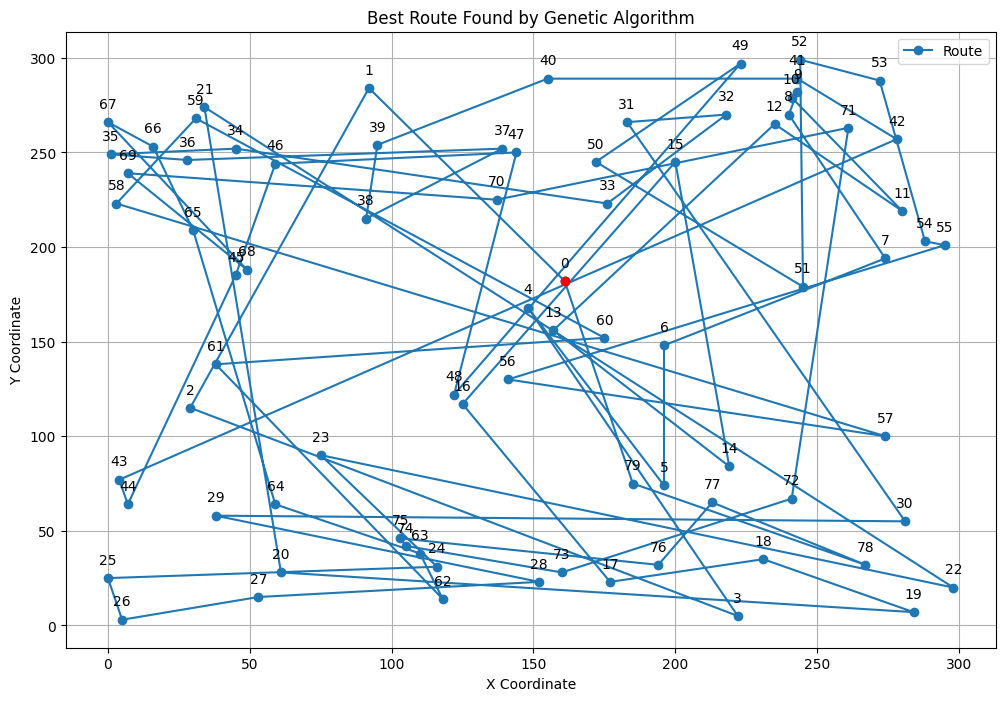

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Create cities
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Create a route
def create_route(city_list):
    route = random.sample(city_list, len(city_list))
    return route

# Calculate the route's total distance
def route_distance(route):
    return sum([route[i].distance(route[i+1]) for i in range(len(route) - 1)] + [route[-1].distance(route[0])])

# Genetic algorithm functions
def rank_routes(population):
    fitness_results = {i: route_distance(population[i]) for i in range(len(population))}
    return sorted(fitness_results.items(), key=lambda x: x[1])

def selection(ranked_routes, elite_size):
    selection_results = []
    df = pd.DataFrame(np.array(ranked_routes), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()

    for i in range(elite_size):
        selection_results.append(ranked_routes[i][0])
    for i in range(len(ranked_routes) - elite_size):
        pick = 100 * random.random()
        for i in range(len(ranked_routes)):
            if pick <= df.iat[i, 3]:
                selection_results.append(ranked_routes[i][0])
                break
    return selection_results

def breed(parent1, parent2):
    child = []
    child_p1 = []
    child_p2 = []

    gene_a = int(random.random() * len(parent1))
    gene_b = int(random.random() * len(parent1))

    start_gene = min(gene_a, gene_b)
    end_gene = max(gene_a, gene_b)

    child_p1 = [parent1[i] for i in range(start_gene, end_gene)]
    child_p2 = [item for item in parent2 if item not in child_p1]

    child = child_p1 + child_p2
    return child

def mutate(individual, mutation_rate):
    for swapped in range(len(individual)):
        if(random.random() < mutation_rate):
            swap_with = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swap_with]

            individual[swapped] = city2
            individual[swap_with] = city1
    return individual

def next_generation(current_gen, elite_size, mutation_rate):
    ranked = rank_routes(current_gen)
    selection_results = selection(ranked, elite_size)
    parents = [current_gen[i] for i in selection_results]
    children = []
    length = len(parents) - elite_size
    pool = random.sample(parents, len(parents))

    for i in range(0, elite_size):
        children.append(parents[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(parents)-i-1])
        children.append(child)

    next_generation = [mutate(children[i], mutation_rate) for i in range(len(children))]
    return next_generation

# Run the genetic algorithm
def genetic_algorithm(population, pop_size, elite_size, mutation_rate, generations):
    pop = [create_route(population) for i in range(pop_size)]
    print("Initial shortest distance: " + str(1 / rank_routes(pop)[0][1]))

    for i in range(generations):
        pop = next_generation(pop, elite_size, mutation_rate)

    print("Final shortest distance: " + str(1 / rank_routes(pop)[0][1]))
    best_route_index = rank_routes(pop)[0][0]
    best_route = pop[best_route_index]
    return best_route

city_list = [City(x=np.random.randint(0, 300), y=np.random.randint(0, 300)) for _ in range(80)]
best_route = genetic_algorithm(city_list, pop_size=100, elite_size=20, mutation_rate=0.01, generations=500)

# Plotting
x_coords = [city.x for city in best_route]
y_coords = [city.y for city in best_route]
x_coords.append(best_route[0].x)
y_coords.append(best_route[0].y)

plt.figure(figsize=(12, 8))
plt.plot(x_coords, y_coords, 'o-', label='Route')
plt.plot(x_coords[0], y_coords[0], 'ro')  # mark the start city

# Annotate the cities with their indices
for i, city in enumerate(best_route):
    plt.annotate(i, (city.x, city.y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Best Route Found by Genetic Algorithm')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()